In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

Loading and Exploring the dataset

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
# Displaying basic information about the dataset
print("Dataset Overview  :")
df.info()
print("\nSummary Statistics :")
df.describe()

Dataset Overview  :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
null_values = df.isnull().sum()
print("Null Values in each column:\n", null_values)

Null Values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Visualizing the Dataset

In [ ]:
#Class distribution of legitimate transaction and fraudulent transactions
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
#Separating the legitimate and fraudulent data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

Class Distribution

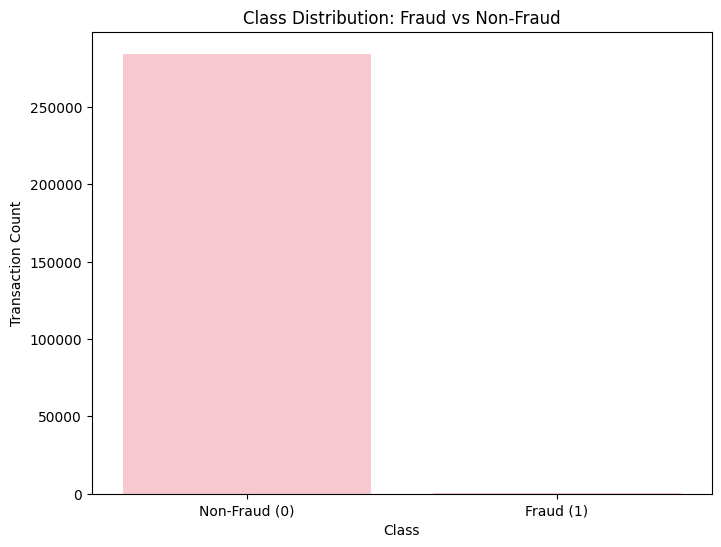

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, color='pink')
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Transaction Count")
plt.show()

Distribution Of Transaction Amounts

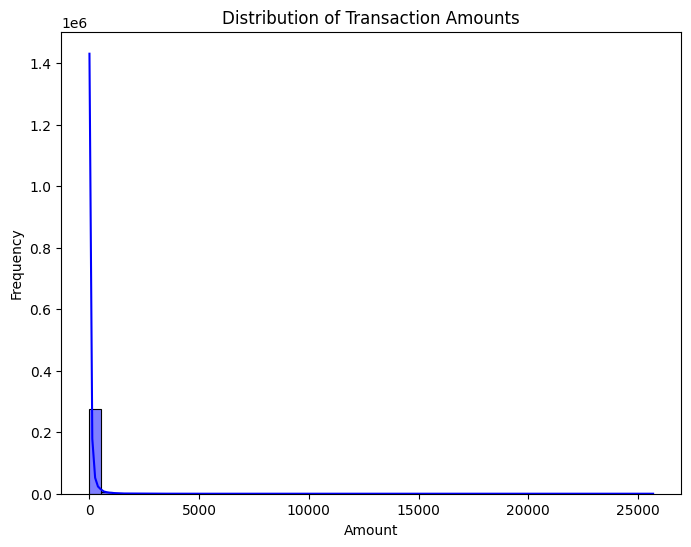

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

Correlation heatmap

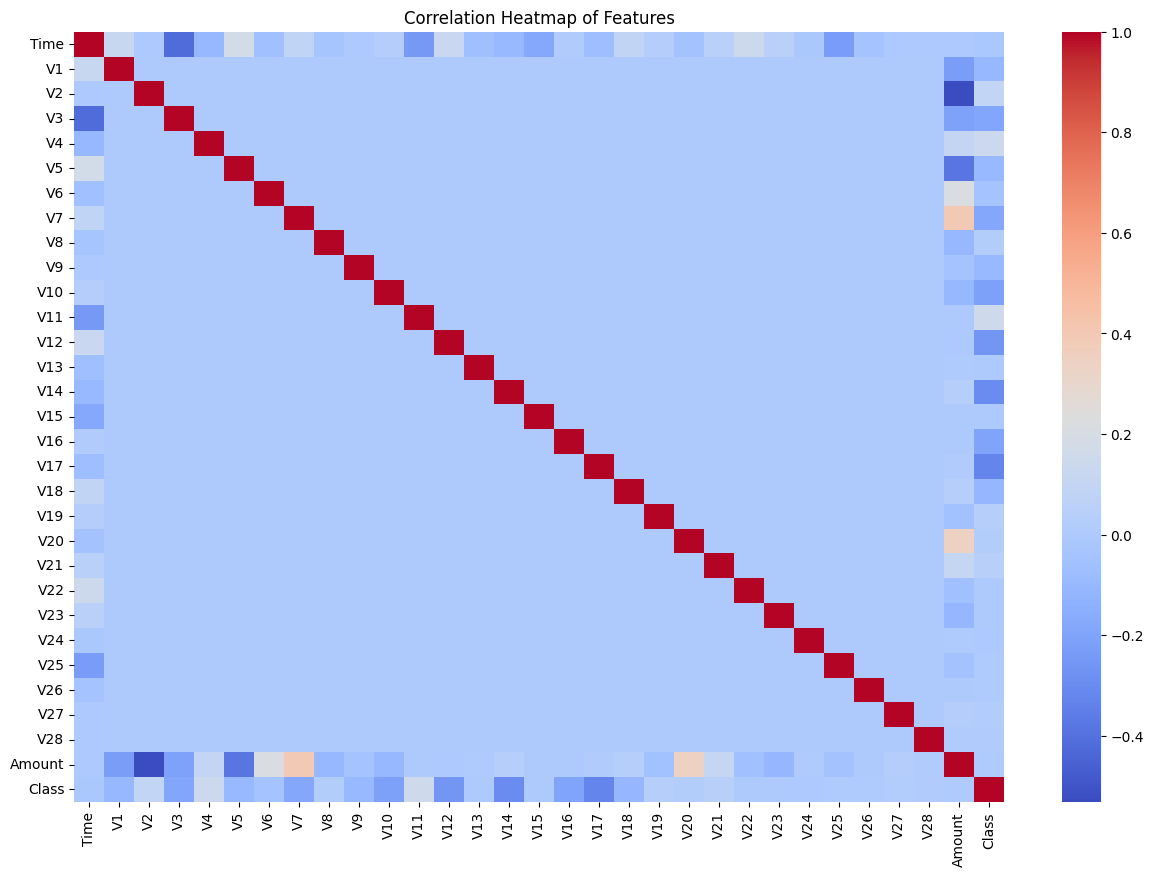

In [ ]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

Fraudulent Transactions Over Time

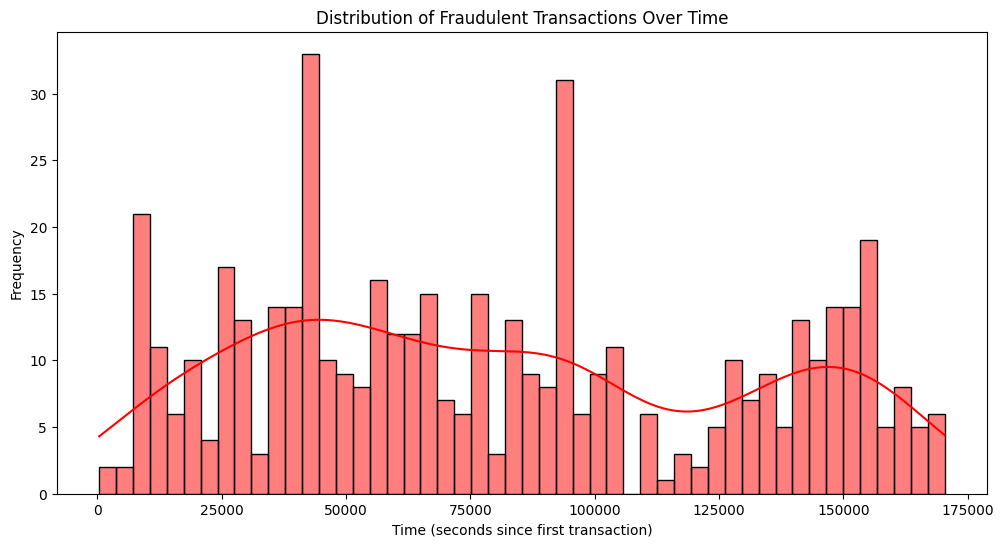

In [ ]:
# Plot the distribution of fraudulent transactions over time
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud, x='Time', bins=50, kde=True, color='red')
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

Scatter Plot : Time vs Amount

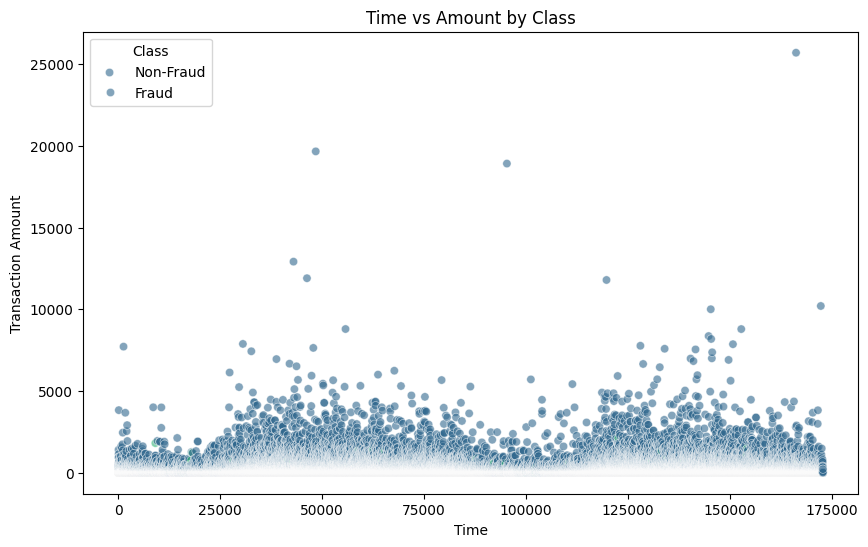

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.6, palette='viridis')
plt.title("Time vs Amount by Class")
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.legend(title="Class", labels=['Non-Fraud', 'Fraud'])
plt.show()

Analysis Of Transaction Amount

(0.0, 10000.0)

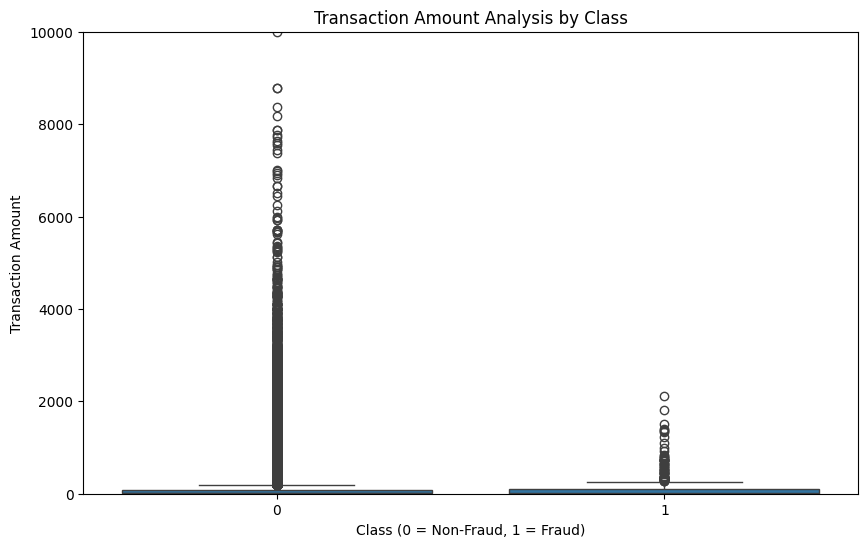

In [ ]:
# Boxplot analysis of transaction amounts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount Analysis by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.ylim(0, 10000)

Outlier Detection and Removal

In [ ]:
# Detecting Outliers using Boxplot
numerical_columns = df.select_dtypes(include=[np.number]).columns

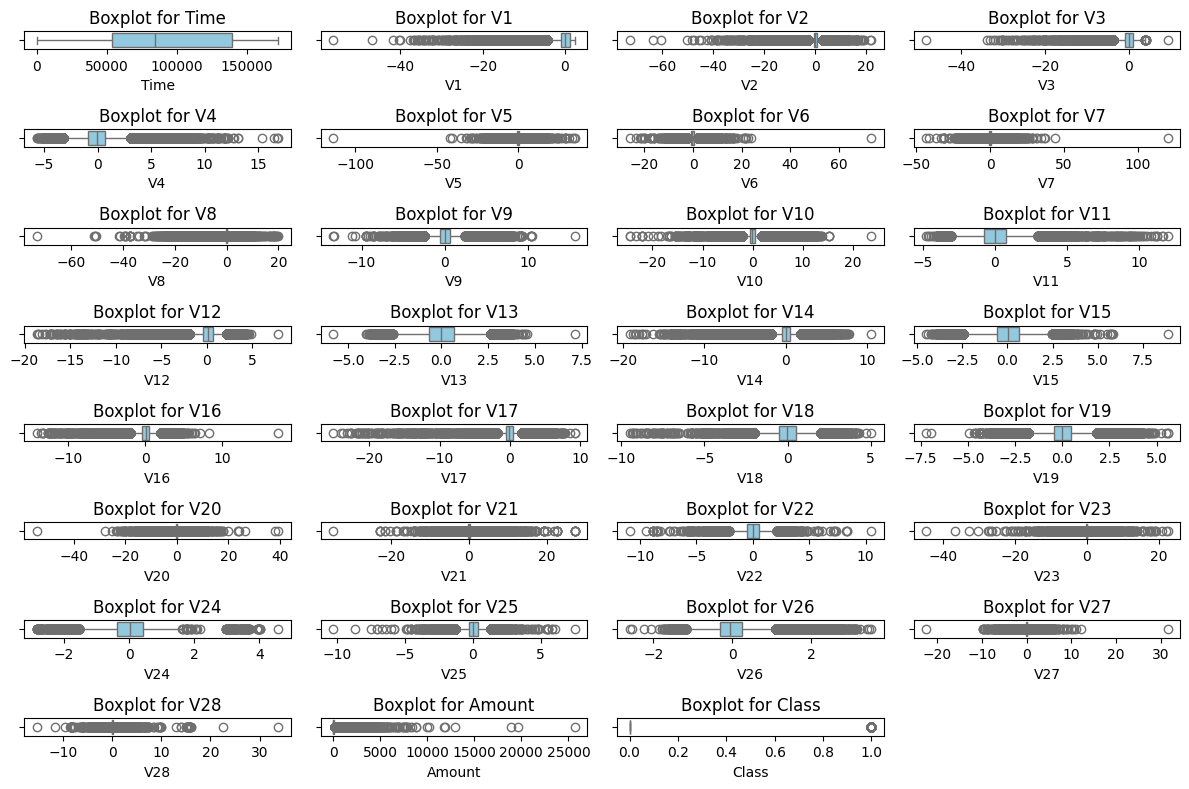

In [ ]:
n_columns = 4
n_rows = (len(numerical_columns) // n_columns) + (1 if len(numerical_columns) % n_columns != 0 else 0)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_columns, i+1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()

Removing outliers

In [ ]:
# Detecting Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df['Amount'] < (Q1['Amount'] - 1.5 * IQR['Amount'])) |
                   (df['Amount'] > (Q3['Amount'] + 1.5 * IQR['Amount'])))

outlier_df = df.copy()
outlier_df['Outlier'] = np.where(outliers, 'Outlier', 'Normal')

print(f'Outliers Detected: {outliers.sum()}')

Outliers Detected: 31904


Dataset after removing Outliers

In [ ]:
# Checking the number of outliers being detected
print(f"Number of outliers detected: {outliers.sum()}")
print(f"Number of normal points: {len(outliers) - outliers.sum()}")

# Printing a few rows to verify the 'Outlier' column
outlier_df[['Amount', 'Outlier']].head()

Number of outliers detected: 31904
Number of normal points: 252903


,Amount,Outlier
0,149.62,Normal
1,2.69,Normal
2,378.66,Outlier
3,123.50,Normal
4,69.99,Normal


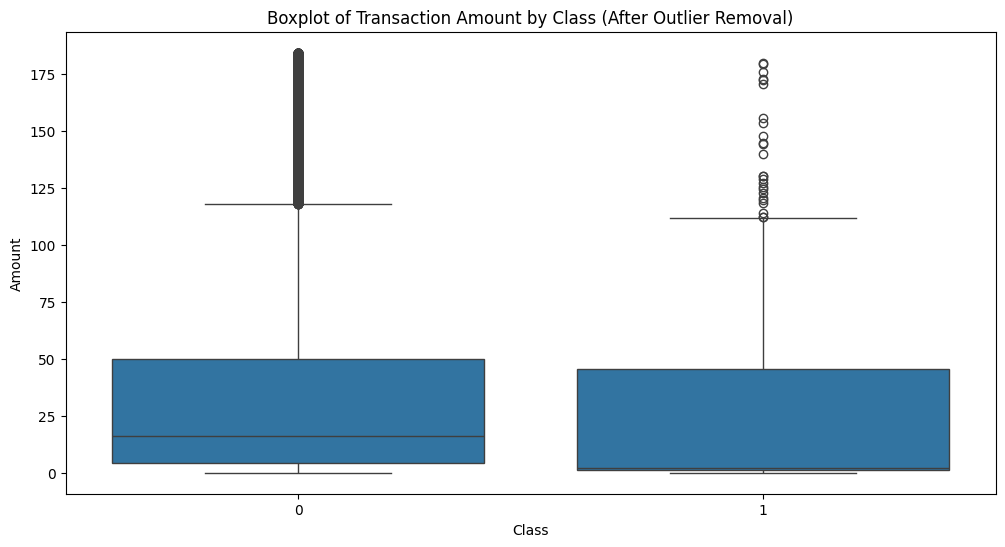

In [ ]:
df_no_outliers = df[~outliers]

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount by Class (After Outlier Removal)')
plt.show()

Summary Statistics Before and After Removing Outliers

In [ ]:
print("\nSummary statistics before removing outliers:")
print(df.describe())

print("\nSummary statistics after removing outliers:")
print(df_no_outliers.describe())


Summary statistics before removing outliers:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15

Handling Class Imbalance

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_no_outliers['Amount'] = scaler.fit_transform(df_no_outliers[['Amount']])
df_no_outliers['Amount'].head()

,Amount
0,2.718502
1,-0.765550
3,2.099136
4,0.830290
5,-0.742312


In [ ]:
X = df_no_outliers.drop('Class', axis=1)
y = df_no_outliers['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())


Class Distribution After Resampling:
Class
0    202012
1    202012
Name: count, dtype: int64


In [ ]:
from collections import Counter

print("Original Class Distribution:", Counter(y_train))
print("Resampled Class Distribution:", Counter(y_resampled))

Original Class Distribution: Counter({0: 202012, 1: 310})
Resampled Class Distribution: Counter({0: 202012, 1: 202012})


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import joblib

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{model_name}:")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Save the model
    model_path = f'{model_name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_path)
    print(f"Model saved at: {model_path}")



Logistic Regression:

Confusion Matrix:
[[50034   456]
 [    9    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50490
           1       0.15      0.90      0.26        91

    accuracy                           0.99     50581
   macro avg       0.58      0.95      0.63     50581
weighted avg       1.00      0.99      0.99     50581


ROC-AUC Score: 0.9909
Precision-Recall AUC: 0.7879


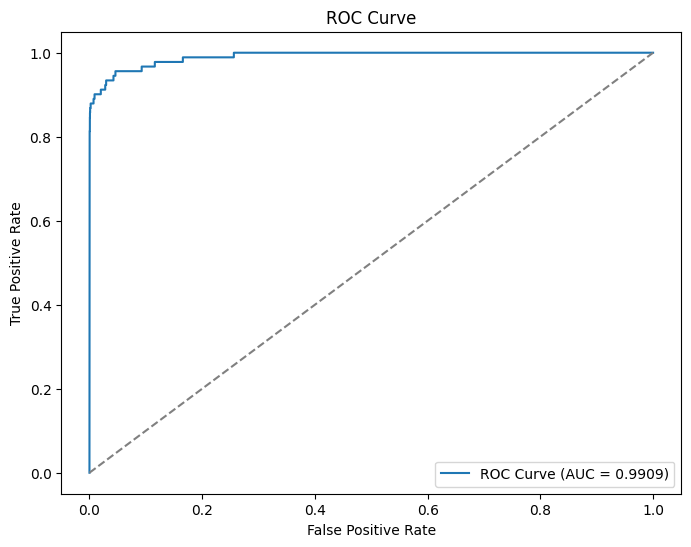

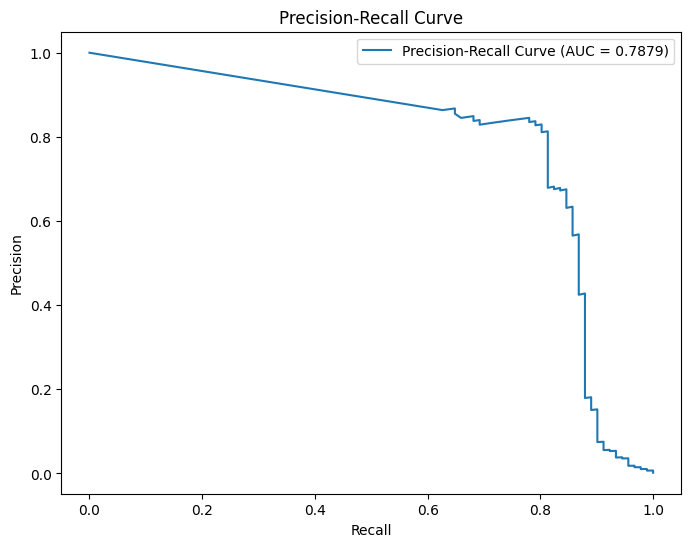

Model saved at: logistic_regression_model.pkl


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(logistic_model, X_resampled, y_resampled, X_test, y_test, "Logistic Regression")


Decision Tree:

Confusion Matrix:
[[50411    79]
 [   17    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.48      0.81      0.61        91

    accuracy                           1.00     50581
   macro avg       0.74      0.91      0.80     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9058
Precision-Recall AUC: 0.6486


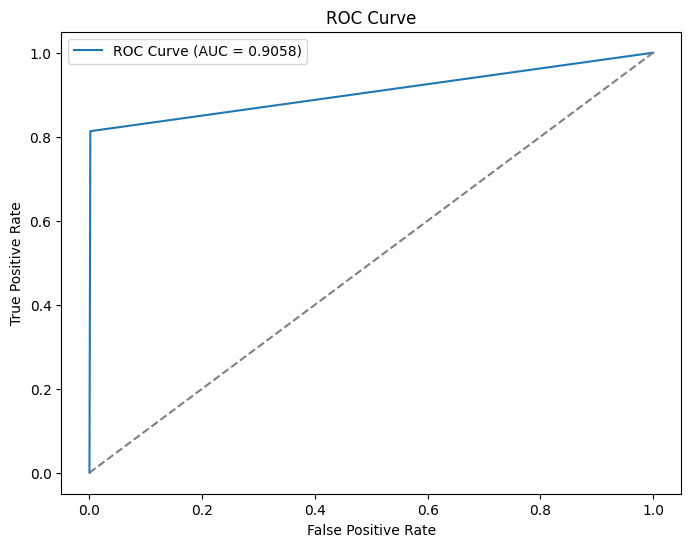

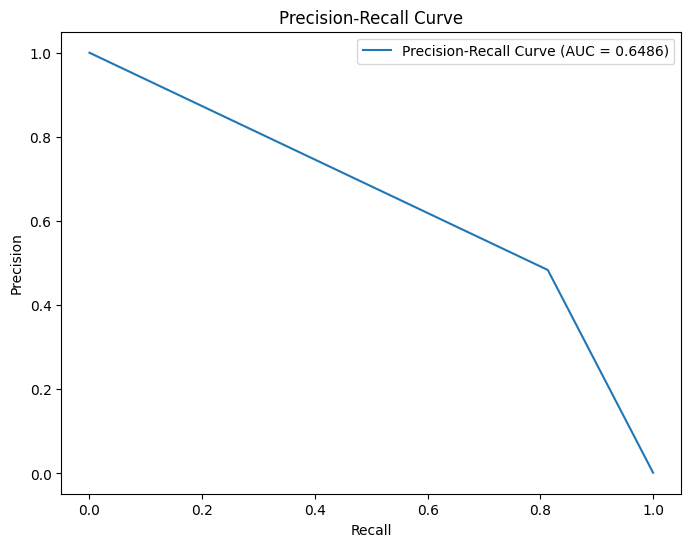

Model saved at: decision_tree_model.pkl


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree_model, X_resampled, y_resampled, X_test, y_test, "Decision Tree")


XGBoost:

Confusion Matrix:
[[50473    17]
 [   15    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.82      0.84      0.83        91

    accuracy                           1.00     50581
   macro avg       0.91      0.92      0.91     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9800
Precision-Recall AUC: 0.8793


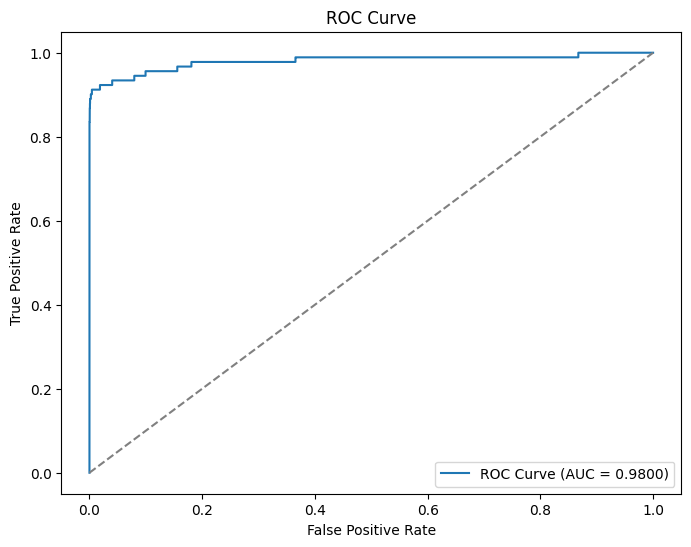

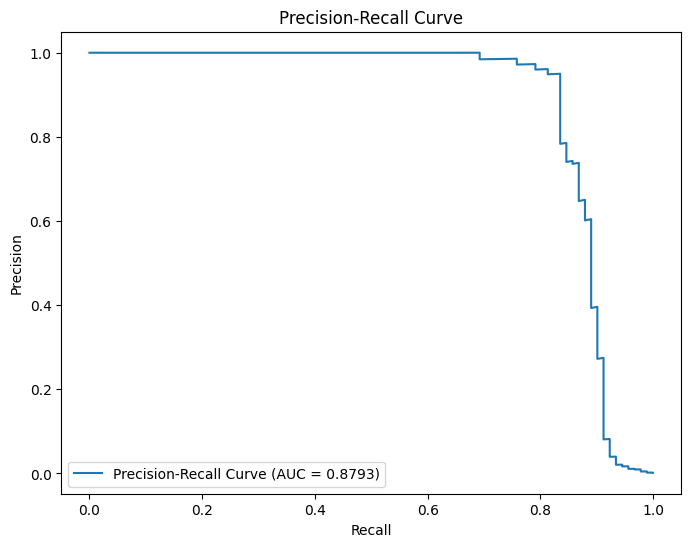

Model saved at: xgboost_model.pkl


In [ ]:
# XGBoost Classifier (Gradient Boosting)
xgboost_model = XGBClassifier(random_state=42, eval_metric='logloss')
evaluate_model(xgboost_model, X_resampled, y_resampled, X_test, y_test, "XGBoost")


LightGBM:
[LightGBM] [Info] Number of positive: 202012, number of negative: 202012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 404024, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Confusion Matrix:
[[50465    25]
 [   15    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.75      0.84      0.79        91

    accuracy                           1.00     50581
   macro avg       0.88      0.92      0.90     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9677
Precision-Recall AUC: 0.8229


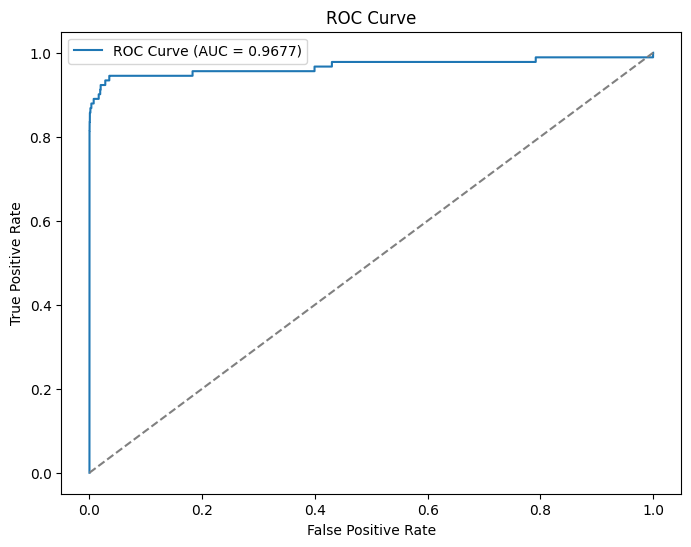

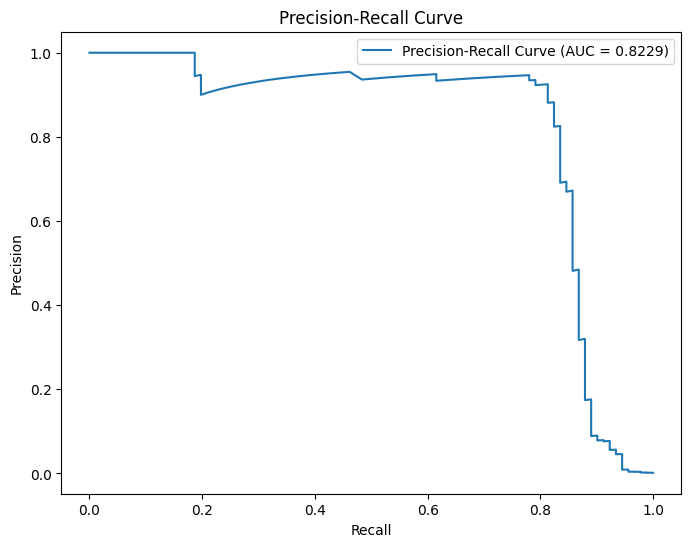

Model saved at: lightgbm_model.pkl


In [ ]:
# LightGBM Classifier (Gradient Boosting)
lgbm_model = LGBMClassifier(random_state=42)
evaluate_model(lgbm_model, X_resampled, y_resampled, X_test, y_test, "LightGBM")

Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_sample, y_sample)

# Check model score
print(f"Model Accuracy: {xgb_model.score(X_sample, y_sample)}")


Model Accuracy: 1.0


In [1]:
import xgboost as xgb
import numpy as np

# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_sample, label=y_sample)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize variables to store the best parameters and results
best_auc = 0
best_params = {}

# Loop through each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:

            # Define parameters for current iteration
            params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'objective': 'binary:logistic',
                'eval_metric': 'logloss'
            }

            # Perform cross-validation
            cv_results = xgb.cv(
                params=params,
                dtrain=dtrain,
                num_boost_round=200,
                early_stopping_rounds=10,
                nfold=3,
                metrics='logloss',
                seed=42
            )

            # Update the best parameters if the current AUC score is higher
            mean_auc = cv_results['test-logloss-mean'].min()  # Get the lowest log loss
            if mean_auc > best_auc:
                best_auc = mean_auc
                best_params = params

print(f"Best Parameters: {best_params}")


NameError: name 'X_sample' is not defined